# Sandpile model simulaition

In [318]:
import numpy as np
import matplotlib.pyplot as plt

class Sandpile:
    def __init__(self, grid_size):
        self.grid_size = grid_size
        self.grid = np.zeros((grid_size, grid_size))
        self.data = []

    def find_high_piles(self):
        x, y = np.where(self.grid > 4)
        return list(zip(x, y))

    def topple(self):
        unstable = True
        t = 0
        while unstable:
            high_piles_coords = self.find_high_piles()
            t += 1 
            for x, y in high_piles_coords:
                self.grid[x, y] -= 5
                if x > 0: self.grid[x-1, y] += 1
                if x < self.grid_size - 1: self.grid[x+1, y] += 1
                if y > 0: self.grid[x, y-1] += 1
                if y < self.grid_size - 1: self.grid[x, y+1] += 1
                        
            if len(self.find_high_piles()) == 0:
                unstable = False

        self.data.append(t)
    
    def add_sand(self, x, y, grains=1):
        self.grid[x, y] += grains
        self.topple()
            

In [319]:
s = Sandpile(5)
for i in range(5):
    s.add_sand(2, 2)
    print(s.grid)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [335]:
grid_size = 100
num_grains = 100000
sandpile = Sandpile(grid_size)
coordinates = np.random.randint(0, grid_size, size=(num_grains, 2))
#coordinates = [[grid_size//2, grid_size//2] for a in range(num_grains)]
for coord in coordinates:
    sandpile.add_sand(coord[0], coord[1])



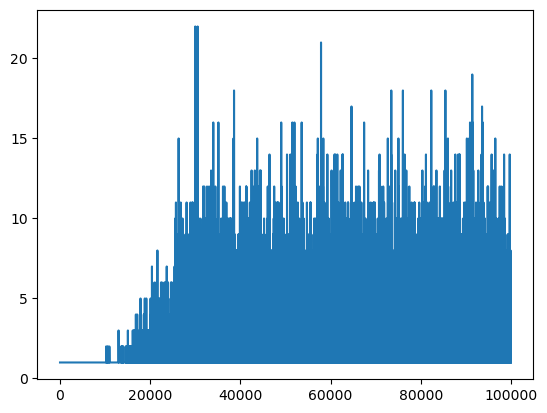

In [336]:
plt.plot(sandpile.data)



[2, 3, 2, 2, 3, 2, 2, 2, 4, 2, 3, 2, 4, 2, 2, 6, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 3, 2, 3, 2, 4, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 4, 2, 4, 3, 3, 2, 2, 4, 3, 2, 3, 2, 2, 3, 3, 7, 2, 2, 3, 4, 3, 2, 2, 2, 5, 2, 6, 2, 2, 3, 2, 2, 2, 4, 2, 4, 4, 4, 2, 3, 2, 2, 2, 4, 5, 2, 5, 3, 7, 4, 6, 2, 2, 3, 3, 7, 2, 6, 2, 4, 3, 2, 2, 2, 2, 12, 4, 2, 2, 2, 4, 2, 4, 3, 3, 2, 4, 2, 2, 3, 4, 3, 5, 2, 3, 3, 4, 2, 3, 2, 3, 2, 4, 3, 2, 7, 2, 2, 2, 2, 2, 4, 3, 6, 8, 3, 4, 7, 4, 2, 5, 5, 4, 2, 2, 2, 3, 2, 3, 4, 3, 3, 2, 2, 6, 3, 3, 3, 4, 3, 4, 6, 4, 4, 4, 2, 5, 2, 6, 5, 3, 6, 2, 2, 2, 4, 3, 2, 8, 3, 2, 5, 8, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 4, 7, 2, 2, 2, 2, 2, 2, 3, 2, 2, 6, 2, 2, 2, 4, 3, 3, 2, 4, 2, 3, 4, 4, 2, 7, 3, 4, 5, 4, 4, 2, 4, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 4, 4, 4, 2, 2, 5, 4, 7, 5, 3, 4, 5, 2, 3, 2, 5, 5, 2, 10, 2, 7, 2, 2, 5, 5, 2, 3, 2, 4, 5, 2, 2, 5, 9, 4, 2, 2, 2, 6, 3, 2, 5, 3, 2, 5, 2, 2, 8, 4, 7, 5, 2, 6, 3, 2, 2, 2, 2, 9, 6, 4, 6, 2, 3, 2, 3, 3

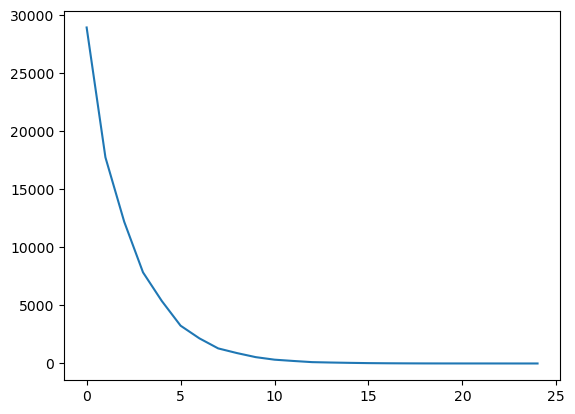

In [322]:
isacco = {}
d = [k for k in sandpile.data if k != 1]
d.pop(1)
for v in d:
    if v not in isacco.keys():
        isacco[v] = 1
    else:
        isacco[v] += 1
plt.plot(sorted(isacco.values(), reverse=True))
print(d)

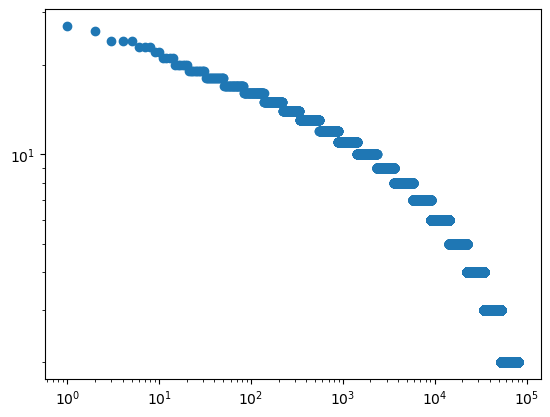

In [323]:
plt.scatter(np.arange(1, len(d)+1), sorted(d, reverse=True))
plt.xscale('log')
plt.yscale('log')


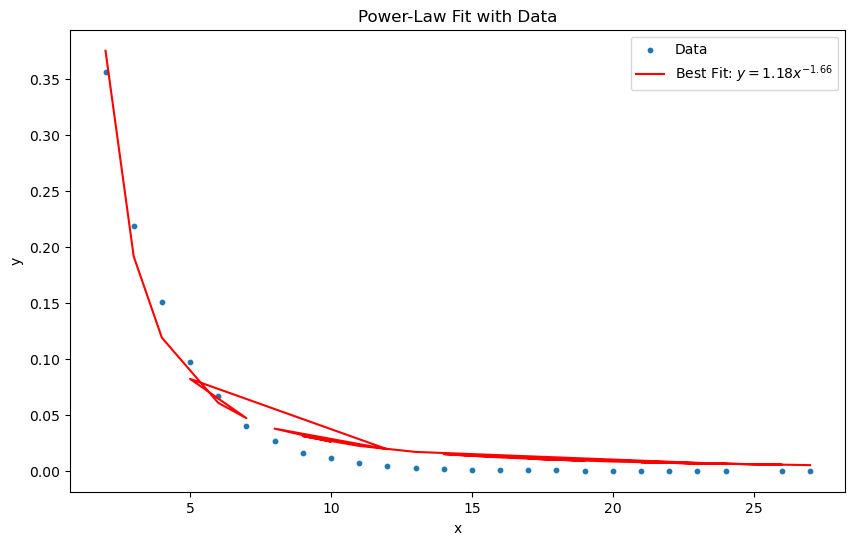

Kolmogorov-Smirnov statistic: 0.5200
p-value: 0.0019
[2, 3, 4, 6, 7, 5, 12, 8, 10, 9, 11, 13, 24, 15, 14, 16, 18, 19, 17, 20, 23, 22, 26, 21, 27]


In [337]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import kstest

# Define the power-law function
def power_law(x, a, b):
    return a * x**(-b)

# Example data (replace with your data)
x_data = list((isacco.keys()))
y_data = np.array(list(isacco.values()))
y_data = y_data / sum(y_data)  # Normalize the data



# Fit the power-law model to the data
popt, _ = curve_fit(power_law, x_data, y_data)

# Extract the optimal parameters
a_opt, b_opt = popt

# Generate fitted curve data
y_fit = power_law(np.array(x_data), a_opt, b_opt)

# Plot the data and the fit on a log-log scale
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, s=10, label='Data')
plt.plot(x_data, y_fit, color='red', label=f'Best Fit: $y = {a_opt:.2f}x^{{-{b_opt:.2f}}}$')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Power-Law Fit with Data')
plt.legend()
plt.show()

# Perform the KS test comparing the normalized data to the power-law distribution
cdf_empirical = np.cumsum(y_data) / np.sum(y_data)
cdf_theoretical = np.cumsum((np.array(x_data) ** (-b_opt)) / np.sum(np.array(x_data) ** (-b_opt)))

ks_statistic, p_value = kstest(cdf_empirical, cdf_theoretical)

# Print the results
print(f"Kolmogorov-Smirnov statistic: {ks_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

print(x_data)

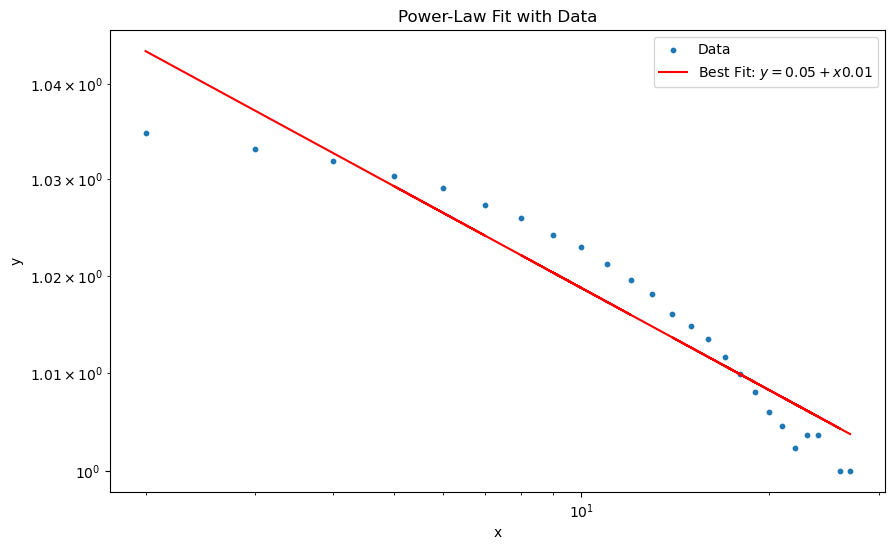

Kolmogorov-Smirnov statistic: 0.3200
p-value: 0.1558
[0.69314718 1.09861229 1.38629436 1.79175947 1.94591015 1.60943791
 2.48490665 2.07944154 2.30258509 2.19722458 2.39789527 2.56494936
 3.17805383 2.7080502  2.63905733 2.77258872 2.89037176 2.94443898
 2.83321334 2.99573227 3.13549422 3.09104245 3.25809654 3.04452244
 3.29583687]


In [329]:

# Define the power-law function
def power_law(x, a, b):
    return a + x*(-b)

# Example data (replace with your data)
x_data = np.log(list((isacco.keys())))
y_data = np.log(np.array(list(isacco.values())))
y_data = y_data / sum(np.arange(len(y_data)))



# Fit the power-law model to the data
popt, _ = curve_fit(power_law, x_data, y_data)

# Extract the optimal parameters
a_opt, b_opt = popt

# Generate fitted curve data
y_fit = power_law(np.array(x_data), a_opt, b_opt)

# Plot the data and the fit on a log-log scale
plt.figure(figsize=(10, 6))
plt.scatter(np.exp(x_data), np.exp(y_data), s=10, label='Data')
plt.plot(np.exp(x_data), np.exp(y_fit), color='red', label=f'Best Fit: $y = {a_opt:.2f}+x{b_opt:.2f}$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Power-Law Fit with Data')
plt.legend()
plt.show()

# Perform the KS test comparing the normalized data to the power-law distribution
cdf_empirical = np.cumsum(y_data) / np.sum(y_data)
cdf_theoretical = np.cumsum((np.array(x_data) ** (-b_opt)) / np.sum(np.array(x_data) ** (-b_opt)))

ks_statistic, p_value = kstest(cdf_empirical, cdf_theoretical)

# Print the results
print(f"Kolmogorov-Smirnov statistic: {ks_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

print(x_data)